In [172]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [173]:
df = pd.read_csv(Path('../data/student-mat.csv'), sep=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [174]:
X = df[['age', 'sex', 'studytime', 'absences', 'G1', 'G2', 'G3']].copy()
X.head(4)

,age,sex,studytime,absences,G1,G2,G3
0,18,F,2,6,5,6,6
1,17,F,2,4,5,5,6
2,15,F,2,10,7,8,10
3,15,F,3,2,15,14,15


In [175]:
X['sex'] = X['sex'].map({'F': 0, 'M': 1})
X.head(3)

,age,sex,studytime,absences,G1,G2,G3
0,18,0,2,6,5,6,6
1,17,0,2,4,5,5,6
2,15,0,2,10,7,8,10


In [176]:
print(f'Dataset has {X.shape[0]} rows and {X.shape[1]} columns')

Dataset has 395 rows and 7 columns


In [177]:
y = X['G3']
X = X.drop('G3', axis=1)
X.head(3)


,age,sex,studytime,absences,G1,G2
0,18,0,2,6,5,6
1,17,0,2,4,5,5
2,15,0,2,10,7,8


In [178]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        395 non-null    int64
 1   sex        395 non-null    int64
 2   studytime  395 non-null    int64
 3   absences   395 non-null    int64
 4   G1         395 non-null    int64
 5   G2         395 non-null    int64
dtypes: int64(6)
memory usage: 18.6 KB


In [179]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
sex,395.0,0.473418,0.499926,0.0,0.0,0.0,1.0,1.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
absences,395.0,5.708861,8.003096,0.0,0.0,4.0,8.0,75.0
G1,395.0,10.908861,3.319195,3.0,8.0,11.0,13.0,19.0
G2,395.0,10.713924,3.761505,0.0,9.0,11.0,13.0,19.0


In [180]:
X.corr()

,age,sex,studytime,absences,G1,G2
age,1.000000,-0.028606,-0.004140,0.175230,-0.064081,-0.143474
sex,-0.028606,1.000000,-0.306268,-0.066962,0.091839,0.091099
studytime,-0.004140,-0.306268,1.000000,-0.062700,0.160612,0.135880
absences,0.175230,-0.066962,-0.062700,1.000000,-0.031003,-0.031777
G1,-0.064081,0.091839,0.160612,-0.031003,1.000000,0.852118
G2,-0.143474,0.091099,0.135880,-0.031777,0.852118,1.000000


<Axes: xlabel='G3', ylabel='Count'>

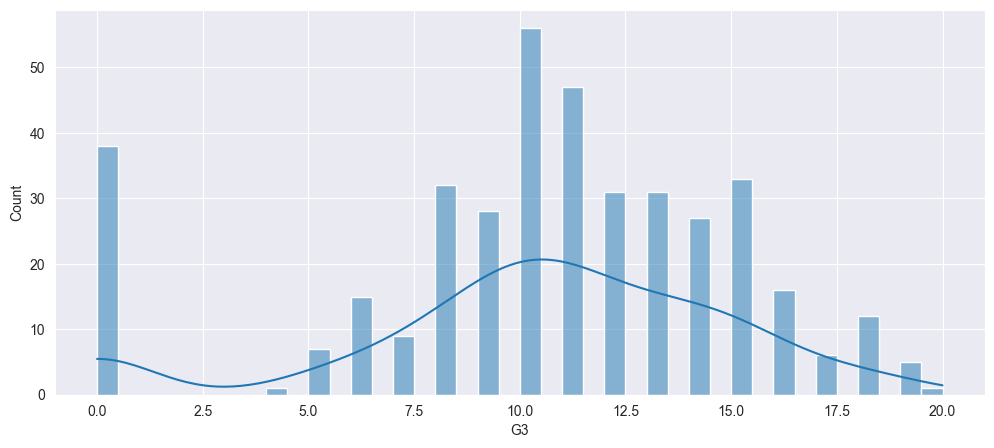

In [181]:
plt.figure(figsize=(12,5))
sns.histplot(y, kde=True, bins=40)

In [120]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [121]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.3, random_state=42)

In [122]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [123]:
print(f'Training: {len(X_train)}, Validate: {len(X_val)}, Test: {len(X_test)} ')

Training: 276, Validate: 59, Test: 60 


In [124]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [125]:
numeric_features = X.select_dtypes(include='int64').columns.tolist()

In [106]:
preprocess = ColumnTransformer(
    [('scaler', StandardScaler(), numeric_features)], remainder='passthrough'
)
preprocess

,transformers,"[('scaler', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


In [126]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

mdl = Pipeline(
    steps=[('preprocess', preprocess), ('model', LinearRegression(

    ))]
)
mdl

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('scaler', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [127]:
mdl.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('scaler', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [130]:
y_val_pred = mdl.predict(X_val)
y_val_pred

array([ 7.9758711 ,  4.78047107, 10.50586322, 20.36028384,  6.67459665,
       11.26609408,  8.20909164,  8.3574178 , 10.22010184, 11.9446054 ,
        8.51206473, 19.25741069,  8.88649337, 12.13333198,  9.20028122,
        3.68343399, 13.59244222,  7.81484466, 11.97885746, 13.9917095 ,
        8.51282951, 19.03561577, 12.88849155,  6.44999121, 10.19299407,
       15.39154726, 12.82136978, 13.31546103,  5.74063278,  5.55008283,
       14.95391695,  4.15548877, 16.86842908,  3.88597044, 18.4072121 ,
       15.4837573 , 11.15428282,  5.93831824, 11.9500215 , 10.5157855 ,
       16.02236564,  3.26152952,  4.39934434,  9.32747557, 14.04147235,
       10.74917741,  6.9965019 , 10.54046008,  3.34416207,  8.48700269,
       15.12206145, 14.20080415, 13.01137835,  9.49242211,  9.27229559,
       14.24026739, 10.80640312, 15.1991055 ,  3.82912205])

In [133]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error

In [135]:
val_mse = mean_squared_error(y_val_pred, y_val)
val_mse

5.065678445257754

In [136]:
val_rmse = root_mean_squared_error(y_val_pred, y_val)
val_rmse

2.2507062103388247

In [137]:
val_r2 = r2_score(y_val_pred, y_val)
val_r2

0.7265397200272109

In [138]:
val_mae = mean_absolute_error(y_val_pred, y_val)
val_mae

1.411248707033256

In [139]:
print(f'MSE: {val_mse:.2f}, RMSE: {val_rmse:.2f}, R2: {val_r2:.2f}, MAE: {val_mae:.2f}')

MSE: 5.07, RMSE: 2.25, R2: 0.73, MAE: 1.41


In [142]:
y_test_pred = mdl.predict(X_test)
y_test_pred

array([ 9.78266241, -0.41604209,  7.96897438,  9.59022065, 10.51147795,
        5.86088777, 15.69528514, 15.33188836, 13.53674504, 20.20841491,
       15.14392552, 10.59453048,  5.92953177,  8.8105589 , 13.94926231,
        6.72790227, 15.51069267,  7.11222697, 18.61145051,  4.89680596,
        5.46365788,  5.43635353,  6.80272715,  7.79298059, 15.79419326,
       13.45534347,  8.07219211,  7.59718694,  8.87302832,  8.15748065,
        7.88873339, 14.99282137, -1.38236052, 12.57170859,  6.12064993,
        9.03299411,  7.11503748, 13.31171963, 12.90476711, 12.62535902,
        9.29421066,  9.11671148, 17.41602252, 14.48959006,  7.47208097,
       12.3999888 , 14.47590469,  9.29492444,  8.22783291, 15.66384359,
        4.08198749,  6.12064993, 17.09958437,  5.90801251, 13.68314687,
        7.12685157,  8.70283808,  4.07320102,  4.3642061 ,  9.35926193])

In [143]:
test_mse = mean_squared_error(y_test, y_test_pred)
test_mse

3.4202567784070967

In [144]:
test_rmse = root_mean_squared_error(y_test, y_test_pred)
test_rmse

1.849393624517803

In [145]:
test_r2 = r2_score(y_test, y_test_pred)
test_r2

0.8292338233348282

In [146]:
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mae

1.2197474076785706

In [147]:
print(f'MSE: {test_mse:.2f}, RMSE: {test_rmse:.2f}, R2: {test_r2:.2f}, MAE: {test_mae:.2f}')

MSE: 3.42, RMSE: 1.85, R2: 0.83, MAE: 1.22


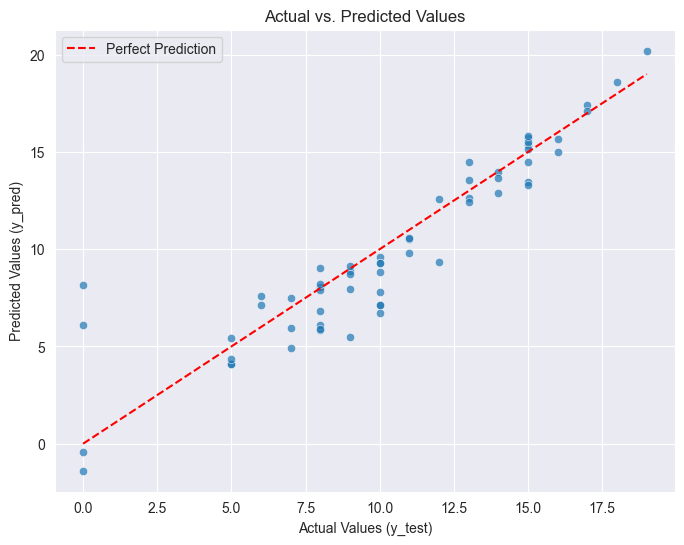

In [151]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()


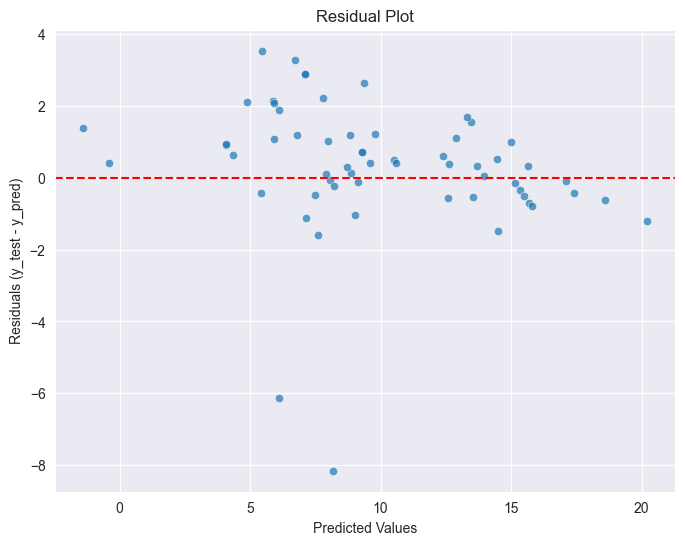

In [153]:
residuals = y_test - y_test_pred

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test_pred, y=residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')

plt.xlabel("Predicted Values")
plt.ylabel("Residuals (y_test - y_pred)")
plt.title("Residual Plot")
plt.show()


Text(0.5, 1.0, 'Histogram of Residuals')

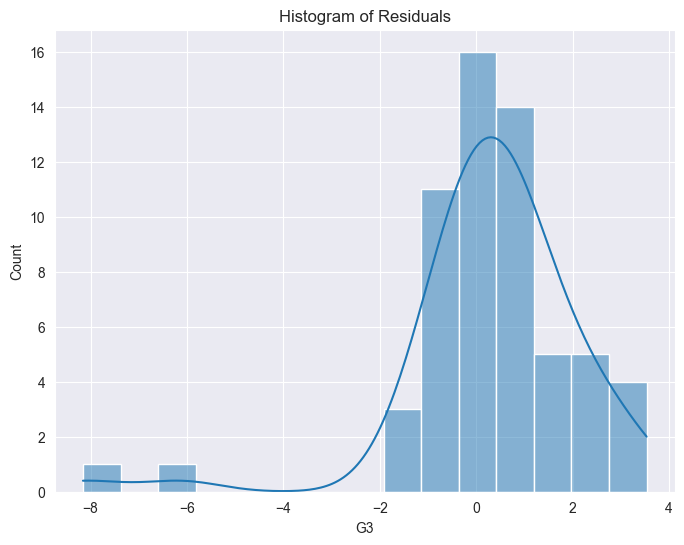

In [156]:
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")


In [157]:
coef = mdl.named_steps['model'].coef_
coef


array([-0.26559228,  0.06613995, -0.01890081,  0.32986369,  0.60627175,
        3.59065426])

In [160]:
pd.DataFrame(coef, index=X.columns, columns=['Coefficients'])

,Coefficients
age,-0.265592
sex,0.066140
studytime,-0.018901
absences,0.329864
G1,0.606272
G2,3.590654


G2 is seen as the dominant predictor of G3 with coefficient 3.59
this means for a 1 point increase in G2, G3 increases by 3.6

RMSE = 1.85 (predictions are wrong by ~1.8 grade points on average)
MAE = 1.2 (Most predictions are off by only about 1 point)
Coefficient or Determination R^2 = 0.83 (Model explains 83% of the variation in final grades(G3))